### GeoSphere website plots

In [8]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
from numba import njit
import importlib
import copy
import locale

#Plotly imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px


#import geosphere colors
import colors as c


#import heliocats files
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

###

outputdir='results/geosphere_web/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)


os.system('jupyter nbconvert --to script geosphere_webplots.ipynb')    


def add_logo(location):
    logo = plt.imread('logo/GSA_Basislogo_Positiv_RGB_XXS.png')
    newax = fig.add_axes(location, anchor='NE', zorder=1)
    newax.imshow(logo)
    newax.axis('off')


system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geosphere_webplots.ipynb to script
[NbConvertApp] Writing 1986 bytes to geosphere_webplots.py


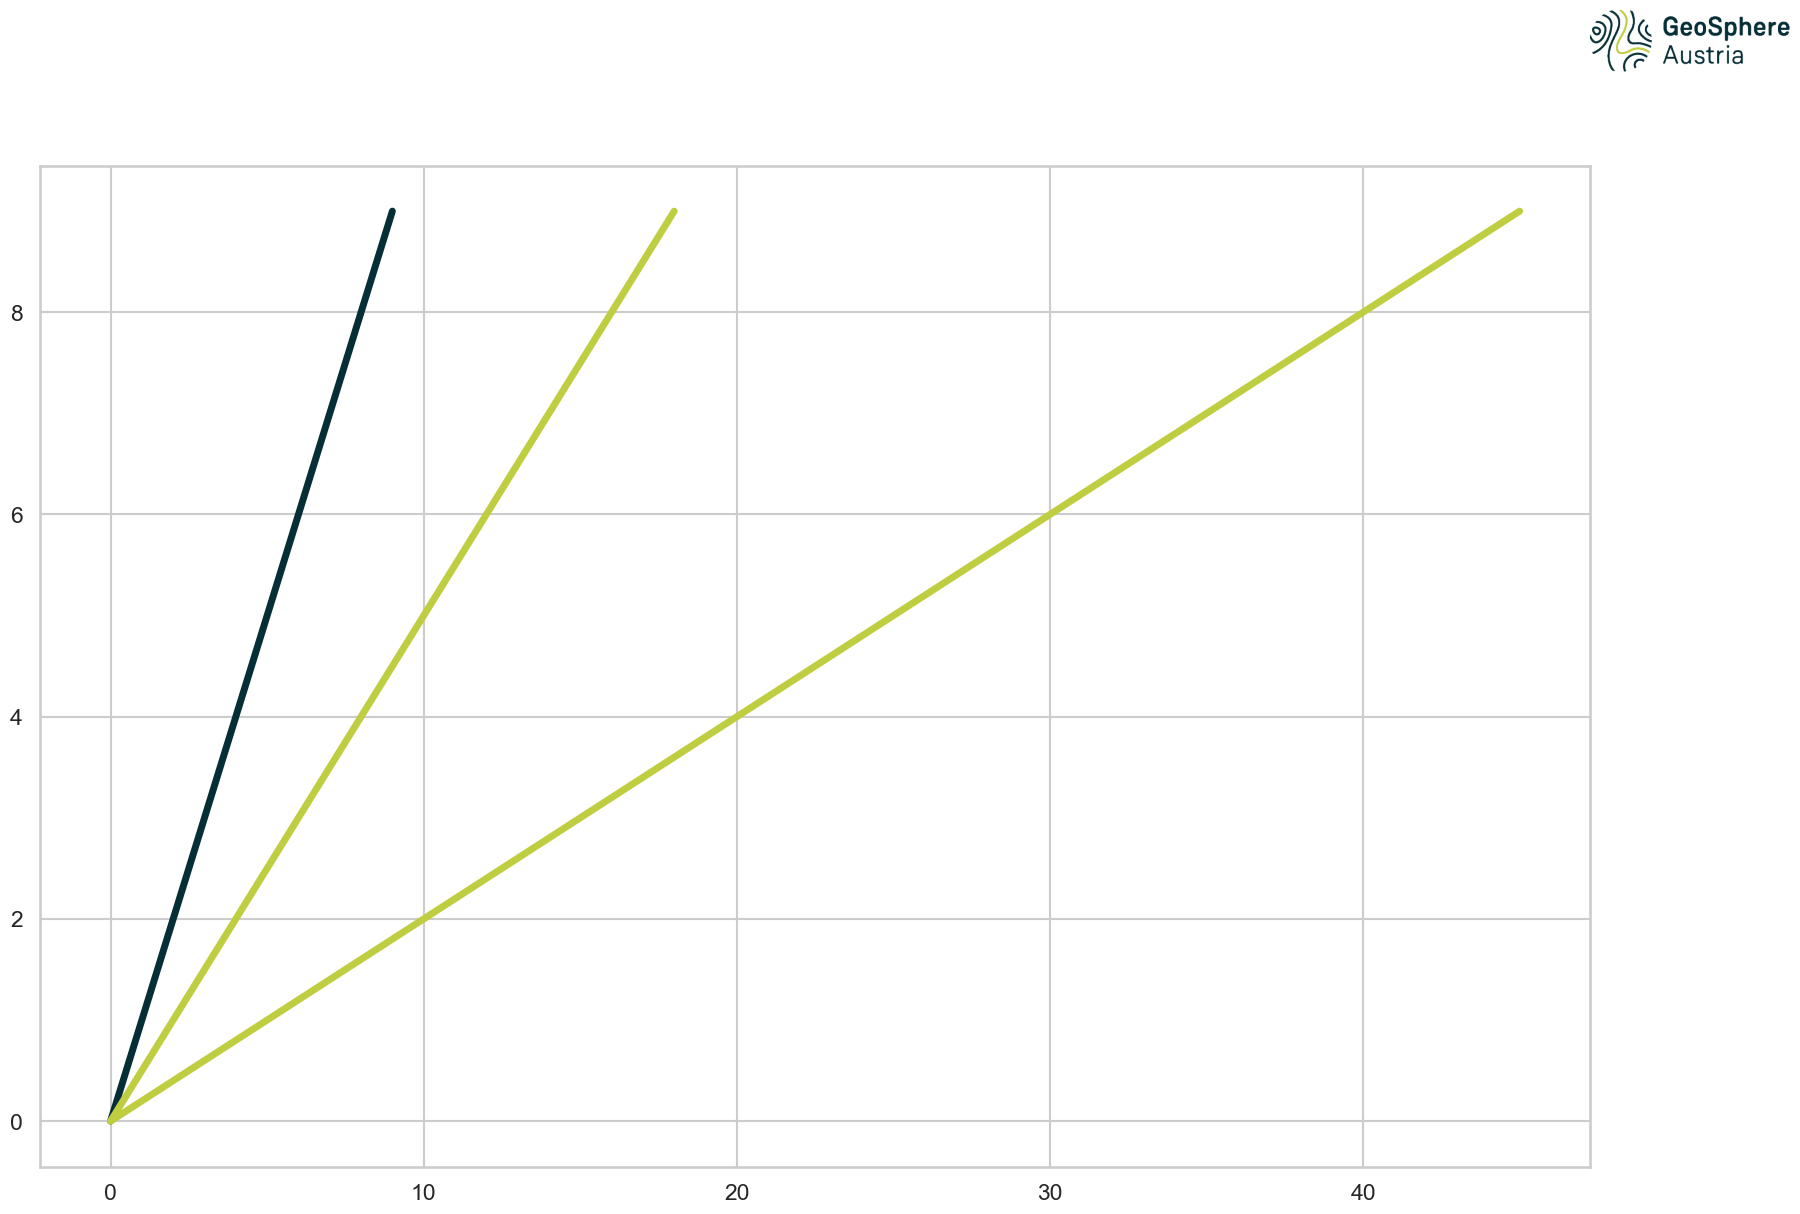

In [9]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax1=plt.subplots(1,figsize=(20,13),dpi=100)


ax1.plot(np.arange(10),np.arange(10),markersize=5,color=c.geo_green,lw=5)
ax1.plot(np.arange(10)*2,np.arange(10),markersize=5,color=c.geo_lime,lw=5)
ax1.plot(np.arange(10)*5,np.arange(10),markersize=5,color=c.geo_ocher,lw=5)


add_logo([0.9,0.9,0.1,0.1])

#plt.tight_layout()

plt.savefig(outputdir+'test.png')


Tabellenüberschrift
Source Sans Pro Bold, 30 Px, Farbe: #052E37, RGB (5/46/55)
2 Achsenbeschriftung
Source Sans Pro Bold, 16 Px, Farbe: #052E37, RGB (5/46/55)
3 Copyrightvermerk
Source Sans Pro Bold, 16 Px, Farbe: #9AACAF, RGB (154/172/175)
wenn möglich rechts unten (kein Logo!)
4 Rahmen
Breite: 1 Px, Farbe: #9AACAF, RGB (154/172/175)
Wenn Grafiken im Content eingesetzt werden und sie auf weiß auslaufen, sollte man einen entsprechenden Rahmen zur opti- schen Begrenzung anlegen. Wenn sie in einem Slider zum Ein- satz kommen, kann dieser Rahmen auch weggelassen werden, da der Slider bereits selbst durch einen Rahmen begrenzt ist.
5 Achsen
Breite: 1 Px, Farbe: #052E37, RGB (5/46/55)
